# Titanic

## Objetivos del ejercicio

Durante el ejercicio propuesto debemos de extraer información mediante preguntas sobre de archivo csv facilitado. La idea es ver que información nos proporciona en base a lo que se le pida y como llegar hasta ella, procesarla y presentarla.

In [1]:
import pandas as pd
import numpy as np
import csv 
import os
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go

In [2]:
# Cargamos el csv con los datos
df = pd.read_csv(os.path.join(os.getcwd(), 'titanic.csv'))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Ahora vamos a pedirle información sobre ella
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Vamos a ver los valores nulos y duplicados y a repararlos
nulos = list(df.isnull().sum(axis=0)[df.isnull().sum(axis=0)>0].index)
print ('Los valores nulos se encuentran en:', nulos)

duplicados= df.duplicated().sum()
print ('Valores duplicados:', duplicados)


Los valores nulos se encuentran en: ['Age', 'Cabin', 'Embarked']
Valores duplicados: 0


In [6]:
# Buscamos donde se encuentran los valores nulos
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

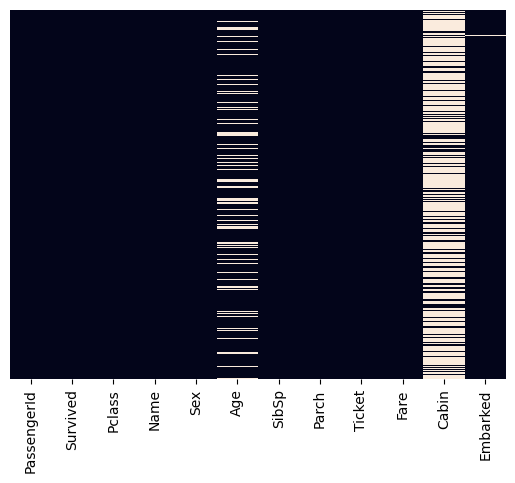

In [7]:
sns.heatmap(df.isnull(), cbar = False, yticklabels=False);

In [8]:
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
# Vemos que la columna Cabin tiene un gran porcentaje NaN por lo que procedemos a eliminarla, puesto que no aporta datos relevantes al sólo tener 204 valores que no son NaN
df = df.drop('Cabin', axis=1)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [10]:
# Para la limpieza de la columna Embarked vamos a usar la moda debido a que son solo 2 valores y no es algo representativo dentro de la muestra, además de ser un str.
moda = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(value=moda)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [11]:
# Comprobamos que se ha cambiado bien y no ha sustituido valores que no debía, pero mantenemos los NaN de Age para poder hacer una media de la edad,
# teniendo en cuenta que esos 177 valores son nulos.
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


## Una vez hemos limpiado nuestro DataFrame de nulos procedemos a realizarle las preguntas y obtener la información sobre él.

In [12]:
# Datos limpios y listos para ser usados
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


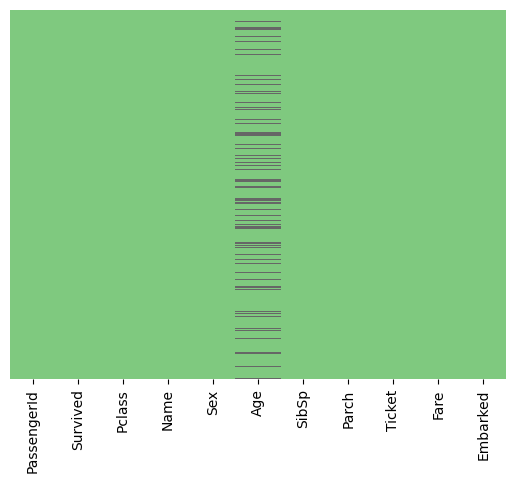

In [13]:
sns.heatmap(df.isnull(), cbar = False, yticklabels=False, cmap = 'Accent');

# Comenzamos el analisis

## Datos relativos a los supervivientes del barco

In [14]:
# Total de supervivientes y su media 

supervivientes= df['Survived'].sum()
print ('Total de supervivientes:', supervivientes)
print ('La media de pasajeros que sobrevivieron:', df['Survived'].mean()*100)

Total de supervivientes: 342
La media de pasajeros que sobrevivieron: 38.38383838383838


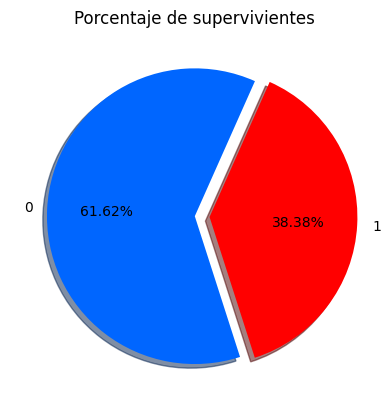

In [15]:
explode = [0, 0.1]
df['Survived'].value_counts().plot.pie(explode=explode, autopct='%1.2f%%', shadow=True, startangle=66, colors=['#0066ff', '#ff0000'])

plt.ylabel('')
plt.title('Porcentaje de supervivientes')
plt.show()

## Pasajeros por clase y supervivencia

In [16]:
# Cantidad de pasajeros por clase

clase= df['Pclass'].value_counts()
print ('Cantidad de pasajeros por clase:\n', clase)

Cantidad de pasajeros por clase:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [17]:
clase2 = df['Pclass'].value_counts().sort_index()

fig = go.Figure(go.Bar(x=clase.index, y=clase, text=clase, textposition='auto'))
fig.update_layout(title='Pasajeros por clase en el Titanic', xaxis_title='Clase', yaxis_title='Cantidad de pasajeros')
fig.show()

In [18]:
# Pasajeros que sobrevivieron según su clase

supervivientes_clase = df.groupby('Pclass')['Survived'].sum()
supervivientes_clase

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [19]:
fig = px.histogram(df, x="Pclass", y="Survived", color="Pclass",
                    labels={"Pclass": "Clase", "Survived": "Supervivientes"}, 
                    title="Supervivientes por clase en el Titanic", template="plotly_dark")
fig.show()

## Porcentaje de supervivientes/clase

In [20]:
# Calculo del porcentaje según la clase

porcentaje_supervivientes = (supervivientes_clase / clase) *100
print('Porcentaje de supervivientes por clase:\n', porcentaje_supervivientes)


Porcentaje de supervivientes por clase:
 Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64


C:\Users\newmo\AppData\Local\Temp\ipykernel_16668\348497142.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




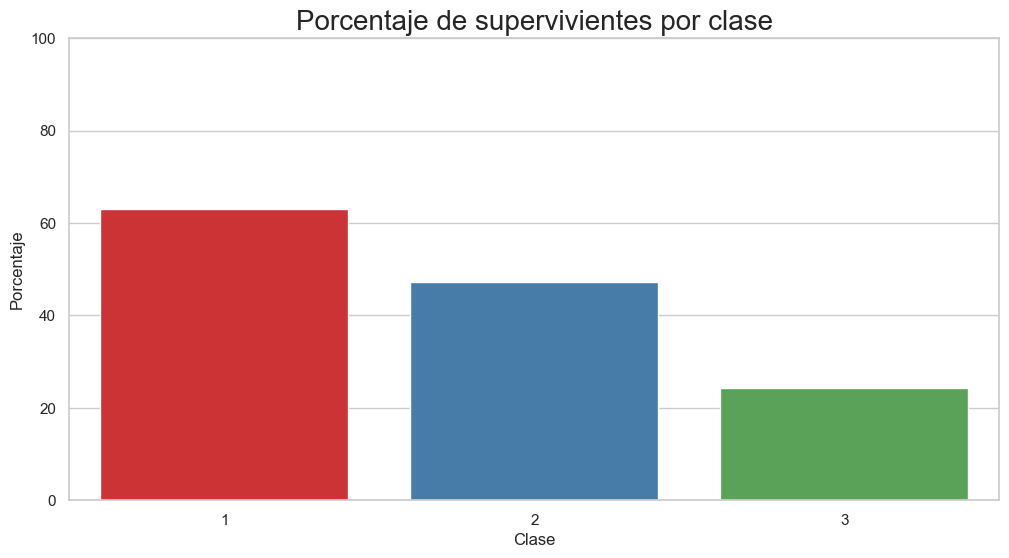

In [21]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x=porcentaje_supervivientes.index, y=porcentaje_supervivientes, palette="Set1")
plt.title('Porcentaje de supervivientes por clase', size=20)
plt.xlabel('Clase')
plt.ylabel('Porcentaje')

plt.ylim(0, 100)

plt.show();

## Sexo y mortandad

In [22]:
# Analizamos la cantidad de hombres y mujeres que viajaban y el reparto de muertes

sex_mas_viajaba= df['Sex'].value_counts()
print('Proporción entre hombres y mujeres:\n',sex_mas_viajaba)

Proporción entre hombres y mujeres:
 Sex
male      577
female    314
Name: count, dtype: int64


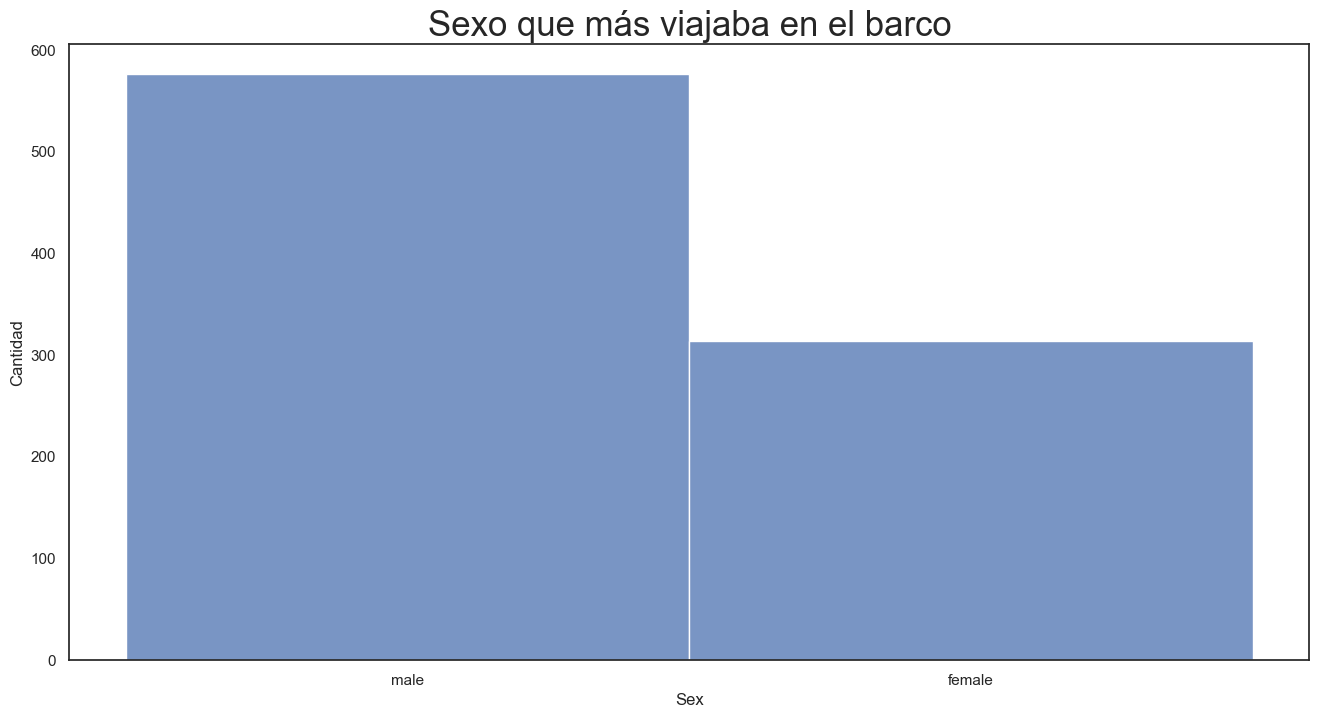

In [23]:
plt.figure(figsize=(16, 8))
sns.set(style="white")
sns.histplot(df['Sex'])
plt.title('Sexo que más viajaba en el barco', size=25)
plt.ylabel('Cantidad')

plt.show();

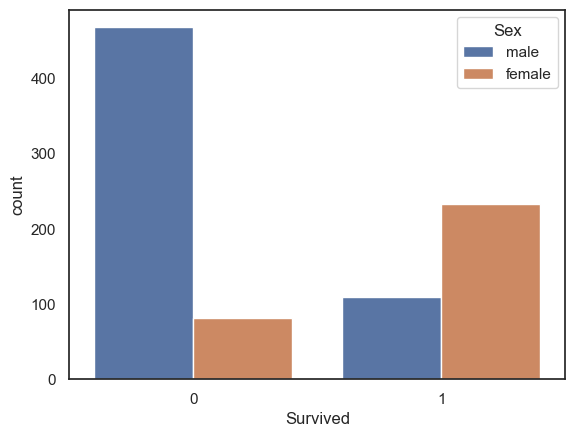

In [24]:
sns.countplot(x='Survived', hue='Sex', data=df)

plt.show();

## Edad media del barco

In [25]:
# Edad media de los pasajeros sin tener en cuenta los NaN

edad_media = df['Age'].mean()
print ('Edad media de los pasajeros:', edad_media)

Edad media de los pasajeros: 29.69911764705882


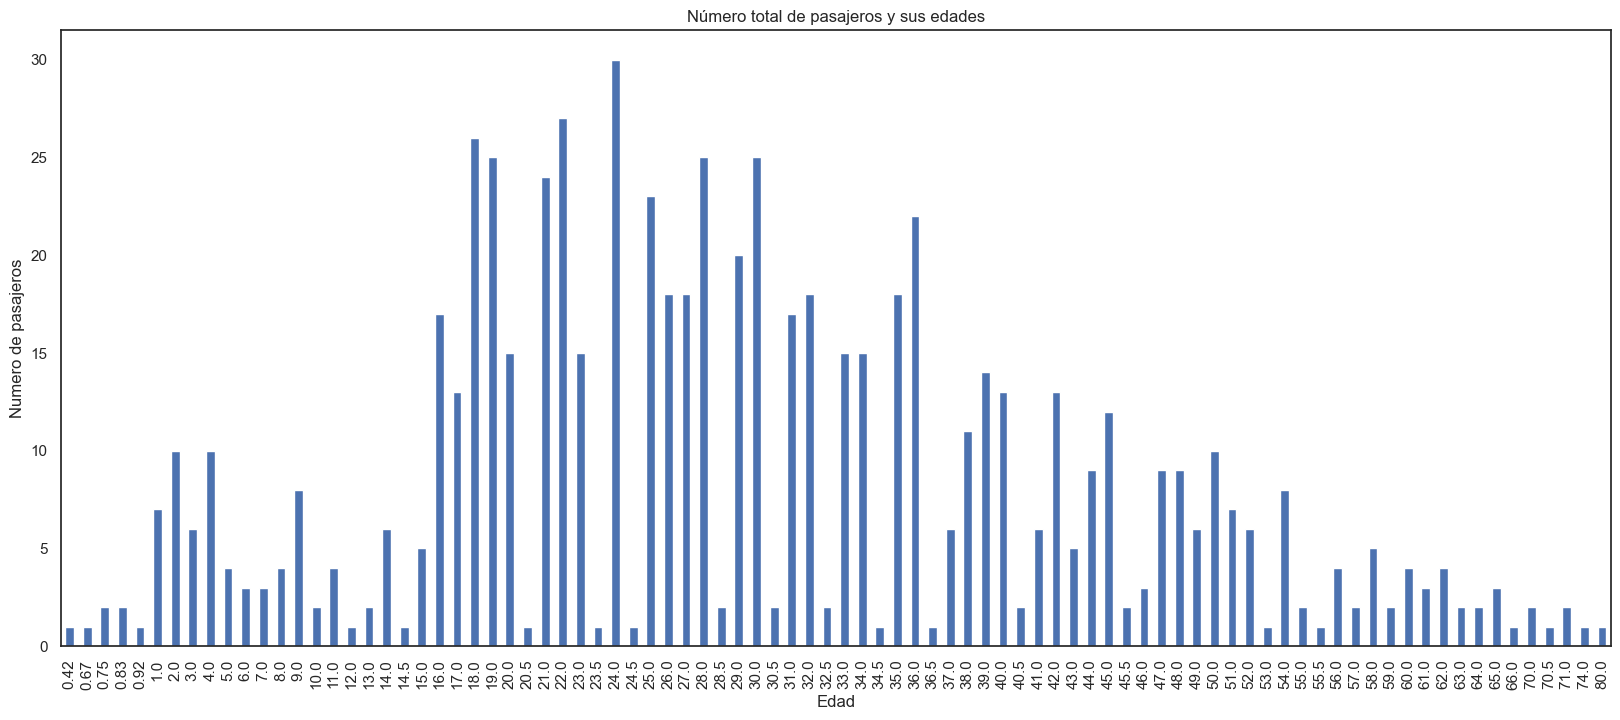

In [26]:
# Grafica sobre la distribución de la edad

total_edades = df.groupby("Age").size()

total_edades.plot(kind = "bar", figsize = (20,8))
plt.ylabel("Numero de pasajeros")
plt.xlabel("Edad")
plt.title("Número total de pasajeros y sus edades")

plt.show();

In [27]:
# Descripción de la columna edad y sus datos

df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

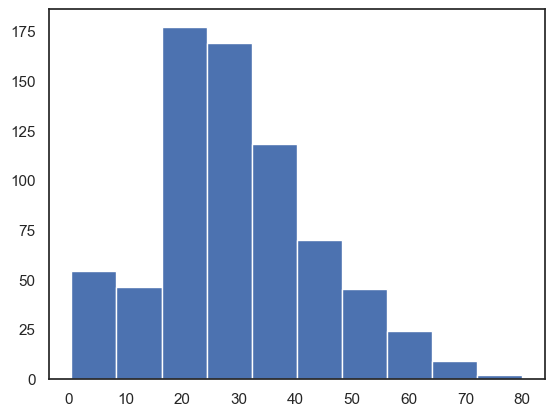

In [28]:
plt.hist(df['Age'])

plt.show();

In [29]:
# La edad media, siendo conscientes de los valores nulos, nos arroja que es una edad media bastante baja.
# Se hace de esta manera, y no poniendo los NaN a 0, porque sino se podría distorsionar los resultados al contabilizar esas posiciones. 
# Ejemplo: 1,2,3,4,0 haría la media entre 5 valores, mientras que si lo dejamos 1,2,NaN,4,6 lo haría sobre 4
# También podemos ver que la mínima era de 0 y la máxima de 80

## Tarifa media del billete y billete más caro

In [30]:
# Calculo del precio medio del billete
tarifa= df['Fare'].mean()
print ('Precio medio del billete:',tarifa)

# Billete de mayor importe
caro= df['Fare'].max()
print('Billete mas caro:', caro)

Precio medio del billete: 32.204207968574636
Billete mas caro: 512.3292


## Número de embarques por cada puerto

In [31]:
# Vamos a calcular el número de embarques por cada uno de los puertos
num_embarques= df['Embarked'].value_counts()
print ('Embarques por puerto:\n',num_embarques)

Embarques por puerto:
 Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


C:\Users\newmo\AppData\Local\Temp\ipykernel_16668\122924420.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




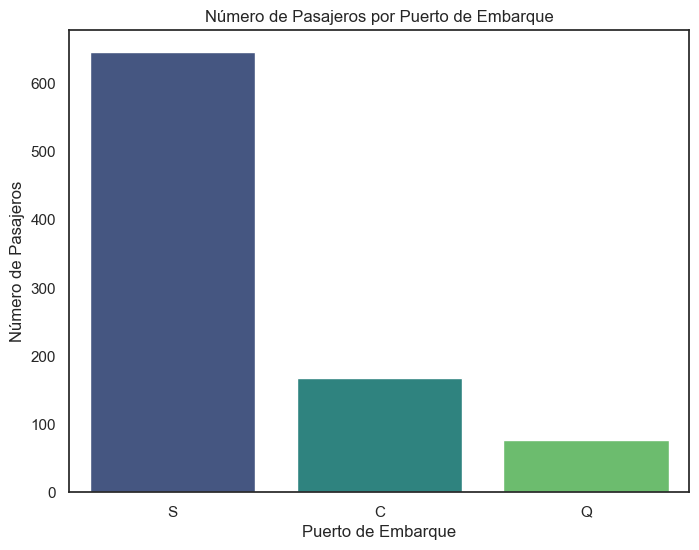

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Embarked', palette='viridis')
plt.title('Número de Pasajeros por Puerto de Embarque')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Número de Pasajeros')

plt.show();

## Relación con la supervivencia según puerto

In [33]:
# Analizamos la relación entre las muertes y el puerto de embarque

puerto_superviviente = df.groupby(["Embarked", "Survived"]).size()
print('Reparto de muertes según el puerto:\n', puerto_superviviente)

Reparto de muertes según el puerto:
 Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
dtype: int64


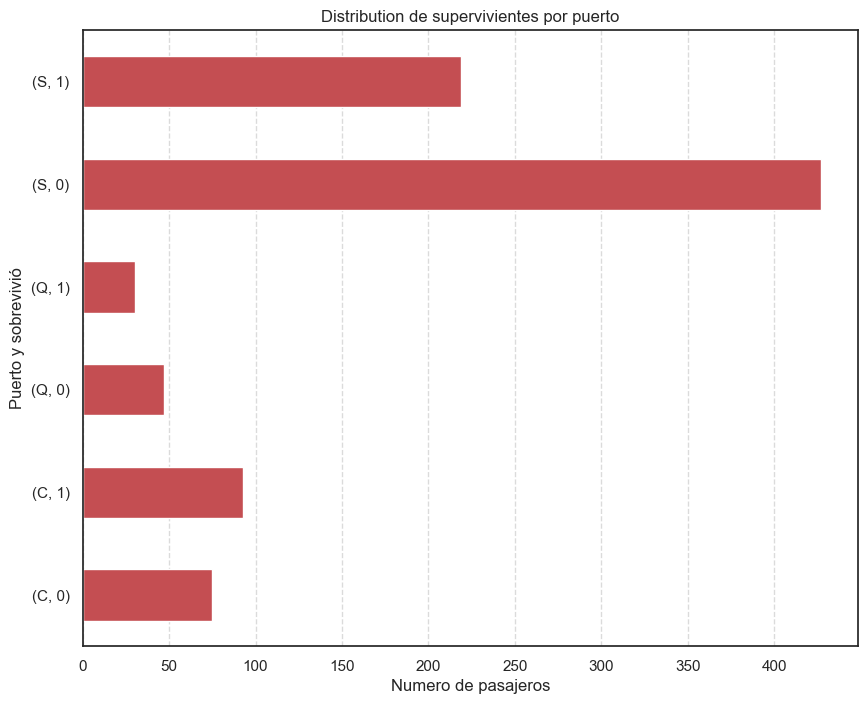

In [34]:
puerto_superviviente.plot(kind = "barh", figsize = (10,8), color = "r")
plt.xlabel("Numero de pasajeros")
plt.ylabel("Puerto y sobrevivió")
plt.title("Distribution de supervivientes por puerto")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show();

## Valores igual a 0 en la columna Fare y su relación

In [35]:
valores_igual_0 = df.query('Fare == 0')
valores_igual_0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,S


In [36]:
# En esta tabla podemos ver que los valores que se corresponden a 0 en la columna Fare, están relacionados con el sexo y el puerto de embarque.

In [38]:
df.to_csv('ejercicio_titanic.csv', index=False)